In [2]:
import pandas as pd
import numpy as np

import InfoTrayectosModule as Tracks
from DecoderModule import Decoder
import InfoStationsModule as Stations

# Decoder creation
Index file from web, to check Ids, names, coordinates etc... is outdated. Ids do not change, but as the stations may change over time, it is important to have an updated list. With Station file is possible to obtain it. I dont think is necessary to keep it it in the main table of Stations, because is repeated information.

It is not necessary to repeat this operation in a daily routine. Everytime a new station file is available would be the best. With savedecoderList() all files are concatenate, and obtain the info of ID, Address, Longitude and Latitude that is saved in ../DataFrame/DatosEstaticos.txt

In [8]:
Stations.SaveDecoderList()
Estaciones = pd.read_csv("../DataFrames/DatosEstaticos.txt", encoding="latin1")


# Add info for cluster stations

In [6]:
import geopandas
from shapely.geometry import Point, Polygon

In [19]:
def checkRegionId(Punto):
    for i in range(0, len(df)):
        if Punto.within(df.iloc[i].geometry):
            return df.iloc[i]["cartodb_id"]
    return "Not Found"

def checkRegionName(Punto):
    for i in range(0, len(df)):
        if Punto.within(df.iloc[i].geometry):
            return df.iloc[i]["name"]
    return "Not Found"




# by Districts

In [15]:
url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/madrid-districts.geojson"
df = geopandas.read_file(url)
df.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Centro,1,2013-12-02T07:20:26,2013-12-02T07:20:26,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40..."
1,Arganzuela,2,2013-12-02T07:20:26,2013-12-02T07:20:26,"MULTIPOLYGON (((-3.70258 40.40638, -3.70166 40..."
2,Retiro,3,2013-12-02T07:20:26,2013-12-02T07:20:26,"MULTIPOLYGON (((-3.66279 40.40971, -3.66384 40..."
3,Salamanca,4,2013-12-02T07:20:26,2013-12-02T07:20:26,"MULTIPOLYGON (((-3.65809 40.43945, -3.65828 40..."
4,Chamartin,5,2013-12-02T07:20:26,2013-12-02T07:20:26,"MULTIPOLYGON (((-3.67231 40.48388, -3.67237 40..."


In [20]:
Estaciones["DistritoId"] = Estaciones['Longitude'].combine(Estaciones['Latitude'], lambda x1, x2:Point(x1,x2)).apply(lambda x: checkRegionId(x))
Estaciones["DistritoName"] = Estaciones['Longitude'].combine(Estaciones['Latitude'], lambda x1, x2:Point(x1,x2)).apply(lambda x: checkRegionName(x))

In [21]:
import plotly.graph_objects as go
import plotly.express as px


mapbox_access_token = open("mapbox_token").read()
fig = go.Figure(go.Scattermapbox(
        lat=Estaciones["Latitude"],
        lon=Estaciones["Longitude"],
        mode='markers',
        marker=go.scattermapbox.Marker(
             color= Estaciones["DistritoId"], showscale=True,
             colorscale=px.colors.qualitative.Plotly
        ),
        
       text=Estaciones["DistritoName"],
        
    ))

fig.update_layout(
    title = dict( 
        
        x=0.5,
    ),

    autosize=True,
    hovermode='closest',
    width=750,
    height=500,
    margin=dict(
        l=50,
        r=0,
        b=50,
        t=50
        
    ),
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=float(Estaciones["Latitude"].iloc[0]),
            lon= float(Estaciones["Longitude"].iloc[0])
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()

# by Barrios

In [23]:
url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/madrid.geojson"
df = geopandas.read_file(url)
Estaciones["BarrioId"] = Estaciones['Longitude'].combine(Estaciones['Latitude'], lambda x1, x2:Point(x1,x2)).apply(lambda x: checkRegionId(x))
Estaciones["BarrioName"] = Estaciones['Longitude'].combine(Estaciones['Latitude'], lambda x1, x2:Point(x1,x2)).apply(lambda x: checkRegionName(x))

In [100]:
fig = go.Figure(go.Scattermapbox(
        lat=Estaciones["Latitude"],
        lon=Estaciones["Longitude"],
        mode='markers',
        marker=go.scattermapbox.Marker(
             color= Estaciones["BarrioId"], showscale=True,
             colorscale=px.colors.qualitative.Plotly
        ),
        
       text=Estaciones["BarrioName"],
        
    ))

fig.update_layout(
    title = dict( 
        
        x=0.5,
    ),

    autosize=True,
    hovermode='closest',
    width=750,
    height=500,
    margin=dict(
        l=50,
        r=0,
        b=50,
        t=50
        
    ),
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=float(Estaciones["Latitude"].iloc[0]),
            lon= float(Estaciones["Longitude"].iloc[0])
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()

# Bigger regions (artificial)
Cardinal directions

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as pt

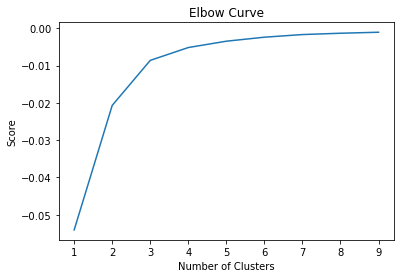

In [31]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = Estaciones[['Latitude']]
X_axis = Estaciones[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
pt.plot(K_clusters, score)
pt.xlabel('Number of Clusters')
pt.ylabel('Score')
pt.title('Elbow Curve')
pt.show()

In [113]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(Estaciones[['Latitude', "Longitude"]]) # Compute k-means clustering.
df1 = Estaciones[['Latitude', "Longitude"]].copy()
df1['cluster_label'] = kmeans.fit_predict(Estaciones[['Latitude', "Longitude"]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Estaciones[['Latitude', "Longitude"]]) # Labels of each point
df1.head(10)

,Latitude,Longitude,cluster_label
0,40.416896,-3.702425,2
1,40.417001,-3.702421,2
2,40.420589,-3.705842,2
3,40.430294,-3.706917,2
4,40.428552,-3.702587,2
5,40.428528,-3.702060,2
6,40.424148,-3.698447,2
7,40.425191,-3.697771,2
8,40.427868,-3.695440,2
9,40.415606,-3.709508,2


In [114]:
fig = go.Figure(go.Scattermapbox(
        lat=df1["Latitude"],
        lon=df1["Longitude"],
        mode='markers',
        marker=go.scattermapbox.Marker(
             color= df1["cluster_label"], showscale=True,
             colorscale=px.colors.qualitative.Plotly
        ),
         text = df1["cluster_label"]
       
        
    ))

fig.update_layout(
    title = dict( 
        
        x=0.5,
    ),

    autosize=True,
    hovermode='closest',
    width=750,
    height=500,
    margin=dict(
        l=50,
        r=0,
        b=50,
        t=50
        
    ),
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=float(df1["Latitude"].iloc[0]),
            lon= float(df1["Longitude"].iloc[0])
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()

In [121]:
Estaciones["CardinalId"] =df1["cluster_label"]
Estaciones["CardinalName"] =Estaciones["CardinalId"].replace({0:"S", 1:"N", 2:"O", 3:"E"}) 
Estaciones["CardinalId"] =Estaciones["CardinalName"].replace({"O":0, "N":1, "E":2, "S":3}) 

Estaciones.head(5)

,ID,Number,Address,Latitude,Longitude,DistritoId,DistritoName,BarrioId,BarrioName,CardinalId,RegionId,CardinalName
0,1,1a,Puerta del Sol nº 1,40.416896,-3.702425,1,Centro,6,Sol,0,4,O
1,2,1b,Puerta del Sol nº 1,40.417001,-3.702421,1,Centro,6,Sol,0,4,O
2,3,2,Calle Miguel Moya nº 1,40.420589,-3.705842,1,Centro,6,Sol,0,0,O
3,4,3,Plaza del Conde Suchil nº 2-4,40.430294,-3.706917,1,Centro,5,Universidad,0,0,O
4,5,4,Calle Manuela Malasaña nº 5,40.428552,-3.702587,1,Centro,5,Universidad,0,0,O


# Cardinal Regions (with center)

In [106]:
initia = np.array([[-3.7075, 40.42307], [-3.69179, 40.4457], [-3.67386, 40.42484], [-3.6959166, 40.4044], [-3.69546, 40.4192]])
len(initia)
for i, j in enumerate(initia): 
    print(j)

[-3.7075  40.42307]
[-3.69179 40.4457 ]
[-3.67386 40.42484]
[-3.6959166 40.4044   ]
[-3.69546 40.4192 ]


In [107]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [53]:
haversine_distance(initia[0][0], initia[0][1], initia[1][0], initia[1][1])

4.57

In [108]:
def cluster(lat2, lon2):
    val=np.zeros([len(initia)])
    for i, j in enumerate(initia): 
        val[i] = haversine_distance(j[0], j[1], lat2, lon2)
    return np.argmin(val)

In [76]:
cluster(initia[4][0], initia[4][1])

4

In [122]:
Estaciones["RegionId"] = Estaciones['Longitude'].combine(Estaciones['Latitude'], lambda x1, x2:cluster(x1,x2))
Estaciones["RegionName"] =Estaciones["CardinalId"].replace({0:"O", 1:"N", 2:"E", 3:"S", 4:"C"}) 

In [123]:
Estaciones.groupby(by="RegionId").count()

,ID,Number,Address,Latitude,Longitude,DistritoId,DistritoName,BarrioId,BarrioName,CardinalId,CardinalName,RegionName
RegionId,,,,,,,,,,,,
0,55,55,55,55,55,55,55,55,55,55,55,55
1,41,41,41,41,41,41,41,41,41,41,41,41
2,49,49,49,49,49,49,49,49,49,49,49,49
3,39,39,39,39,39,39,39,39,39,39,39,39
4,33,33,33,33,33,33,33,33,33,33,33,33


In [110]:
fig = go.Figure(go.Scattermapbox(
        lat=Estaciones["Latitude"],
        lon=Estaciones["Longitude"],
        mode='markers',
        marker=go.scattermapbox.Marker(
             color= Estaciones["RegionId"], showscale=True,
             colorscale=px.colors.qualitative.Plotly
        ),
        
       text=Estaciones["RegionId"],
        
    ))

fig.update_layout(
    title = dict( 
        
        x=0.5,
    ),

    autosize=True,
    hovermode='closest',
    width=750,
    height=500,
    margin=dict(
        l=50,
        r=0,
        b=50,
        t=50
        
    ),
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=float(Estaciones["Latitude"].iloc[0]),
            lon= float(Estaciones["Longitude"].iloc[0])
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()

In [127]:
Estaciones

,ID,Number,Address,Latitude,Longitude,DistritoId,DistritoName,BarrioId,BarrioName,CardinalId,CardinalName,RegionId,RegionName
0,1,1a,Puerta del Sol nº 1,40.416896,-3.702425,1,Centro,6,Sol,0,O,4,O
1,2,1b,Puerta del Sol nº 1,40.417001,-3.702421,1,Centro,6,Sol,0,O,4,O
2,3,2,Calle Miguel Moya nº 1,40.420589,-3.705842,1,Centro,6,Sol,0,O,0,O
3,4,3,Plaza del Conde Suchil nº 2-4,40.430294,-3.706917,1,Centro,5,Universidad,0,O,0,O
4,5,4,Calle Manuela Malasaña nº 5,40.428552,-3.702587,1,Centro,5,Universidad,0,O,0,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,216,208,"Paseo Castellana, 216",40.466361,-3.688639,6,Tetuan,34,Castillejos,1,N,1,N
213,217,209,Paseo Castellana (Fundación Canal),40.465917,-3.688472,6,Tetuan,34,Castillejos,1,N,1,N
214,218,210,Tres Cruces 7,40.419674,-3.702673,1,Centro,6,Sol,0,O,0,O
215,219,211,Desengaño 1,40.420639,-3.704716,1,Centro,6,Sol,0,O,0,O


In [129]:
Estaciones.to_csv( "../DataFrames/DatosEstaticos.txt", encoding="latin1")

In [3]:
Estaciones = pd.read_csv("../DataFrames/DatosEstaticos.txt", encoding="latin1")

In [4]:
Estaciones

,Unnamed: 0,ID,Number,Address,Latitude,Longitude,DistritoId,DistritoName,BarrioId,BarrioName,CardinalId,CardinalName,RegionId,RegionName
0,0,1,1a,Puerta del Sol nº 1,40.416896,-3.702425,1,Centro,6,Sol,0,O,4,O
1,1,2,1b,Puerta del Sol nº 1,40.417001,-3.702421,1,Centro,6,Sol,0,O,4,O
2,2,3,2,Calle Miguel Moya nº 1,40.420589,-3.705842,1,Centro,6,Sol,0,O,0,O
3,3,4,3,Plaza del Conde Suchil nº 2-4,40.430294,-3.706917,1,Centro,5,Universidad,0,O,0,O
4,4,5,4,Calle Manuela Malasaña nº 5,40.428552,-3.702587,1,Centro,5,Universidad,0,O,0,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,212,216,208,"Paseo Castellana, 216",40.466361,-3.688639,6,Tetuan,34,Castillejos,1,N,1,N
213,213,217,209,Paseo Castellana (Fundación Canal),40.465917,-3.688472,6,Tetuan,34,Castillejos,1,N,1,N
214,214,218,210,Tres Cruces 7,40.419674,-3.702673,1,Centro,6,Sol,0,O,0,O
215,215,219,211,Desengaño 1,40.420639,-3.704716,1,Centro,6,Sol,0,O,0,O
